<a href="https://colab.research.google.com/github/MandiraBanerjee2001/Mandira2001/blob/main/Time_Series_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#1. Selet The Time Series Dataset

In [ ]:
data = pd.read_csv('baggagecomplaints.csv')

In [ ]:
data.head()

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581


In [ ]:
data

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
...,...,...,...,...,...,...,...,...
247,United,08/2010,8,2010,14099,30637,344,4263211
248,United,09/2010,9,2010,9435,28072,161,3679517
249,United,10/2010,10,2010,9565,29144,140,3952549
250,United,11/2010,11,2010,8597,27318,104,3573268


#2. Find Mean, Median, Variance, Standard deviation

In [ ]:
import numpy as np

#Mean

In [ ]:
mean_value = np.mean(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
print("Mean:", mean_value)

Mean: Month        6.500000e+00
Year         2.007000e+03
Baggage      1.261351e+04
Scheduled    2.812801e+04
Cancelled    7.037619e+02
Enplaned     2.203871e+06
dtype: float64


In [ ]:
import statistics as stat

In [ ]:
data

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
...,...,...,...,...,...,...,...,...
247,United,08/2010,8,2010,14099,30637,344,4263211
248,United,09/2010,9,2010,9435,28072,161,3679517
249,United,10/2010,10,2010,9565,29144,140,3952549
250,United,11/2010,11,2010,8597,27318,104,3573268


#Median

In [ ]:
med_val = stat.median(data)

TypeError: ignored

In [ ]:
med_val

'Enplaned'

#Variance

In [ ]:
var_val = stat.variance(data)

TypeError: ignored

In [ ]:
var_val

NameError: ignored

#Standard Deviation

In [ ]:
sd_val = stat.stdev(data)

TypeError: ignored

In [ ]:
sd_val


NameError: ignored

#3. Study The Patterns of Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


#Load Time Series Data

In [ ]:

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


#Visualize Time Series
Plot the time series to visualize the overall pattern.

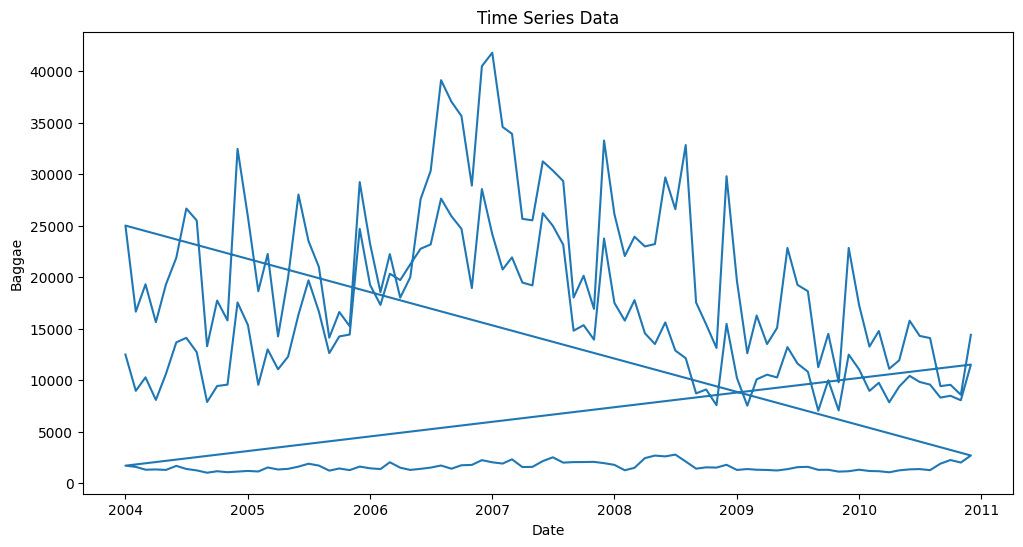

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Baggage'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Baggae')
plt.show()

# Decompose Time Series
Decompose the time series into trend, seasonality, and residual components.

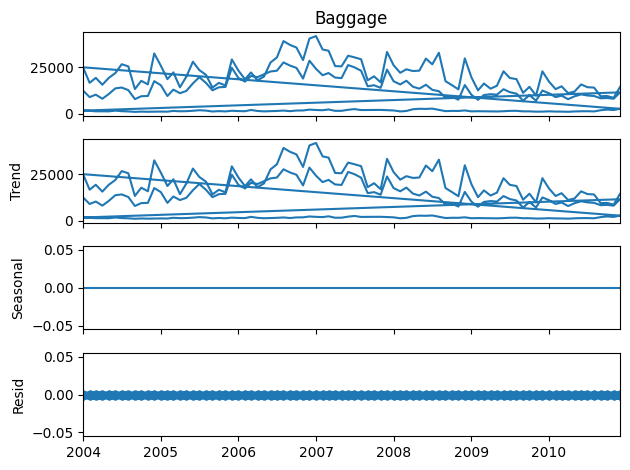

In [ ]:
result = seasonal_decompose(data['Baggage'], model='additive', period=1)
result.plot()
plt.show()

#Explore Trends and Seasonality

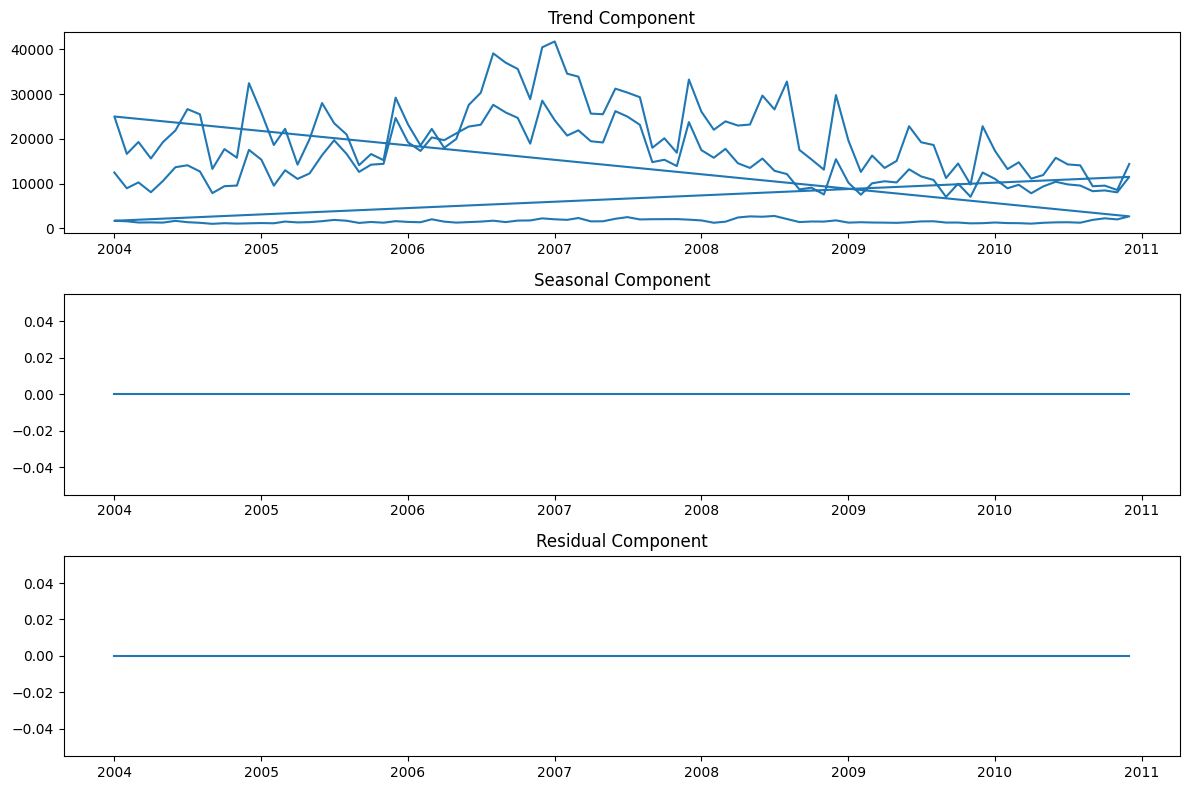

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

#4. Decide the Model

#Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
Plot the ACF and PACF to identify potential lags in the time series.

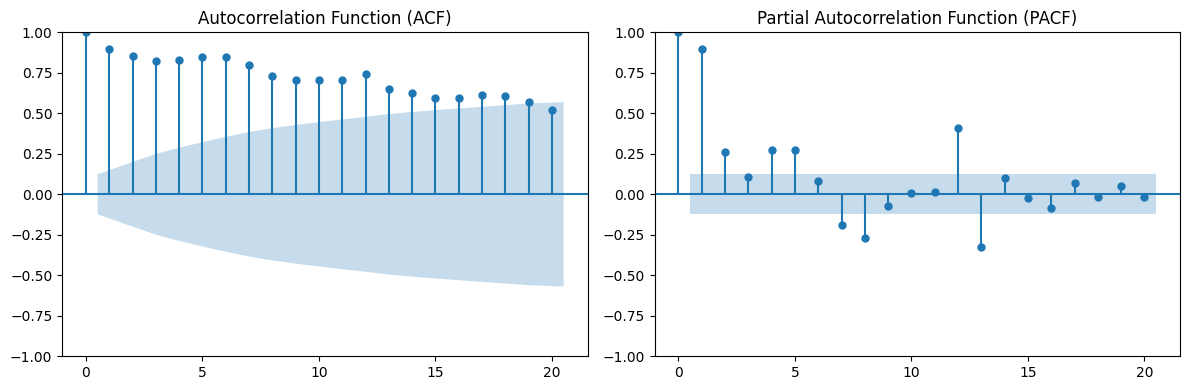

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_acf(data['Baggage'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(data['Baggage'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#Explore Rolling Statistics
Explore rolling mean and rolling standard deviation.

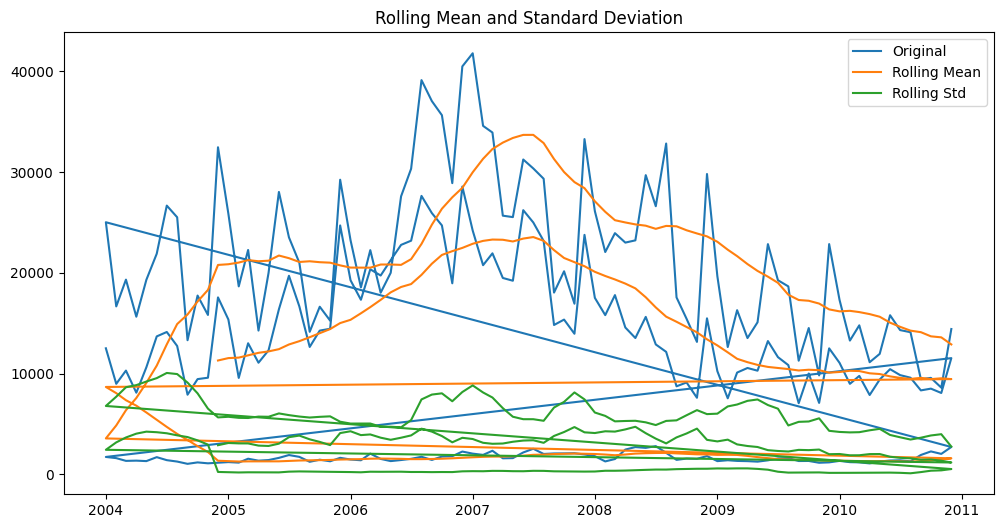

In [ ]:
rolling_mean = data['Baggage'].rolling(window=12).mean()
rolling_std = data['Baggage'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Baggage'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

#Model Building

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Baggage'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Baggage   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2445.516
Date:                Thu, 21 Dec 2023   AIC                           4897.033
Time:                        11:20:34   BIC                           4907.609
Sample:                             0   HQIC                          4901.289
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2402      0.123      1.945      0.052      -0.002       0.482
ma.L1         -0.6785      0.079     -8.534      0.000      -0.834      -0.523
sigma2      1.779e+07   8.99e+05     19.790      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing Sets

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

#5. Decide The Order of the Model

#Train ARIMA Model

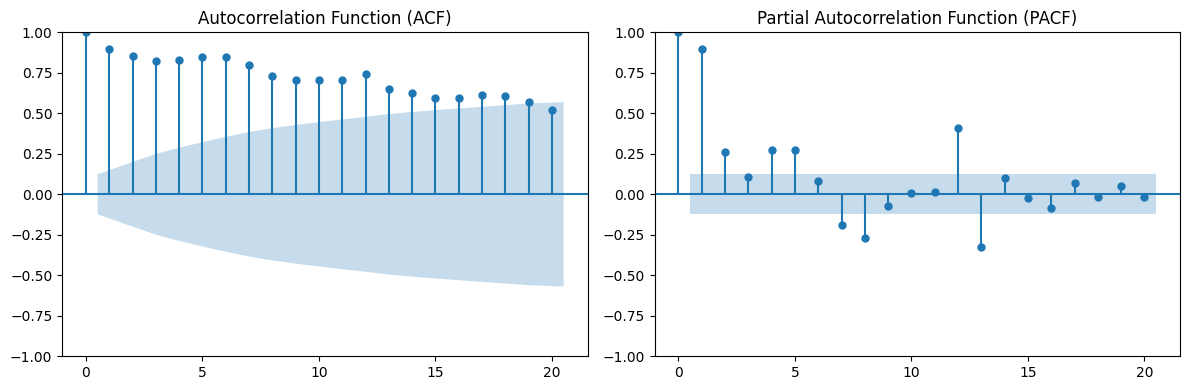

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your time series data
data = pd.read_csv('baggagecomplaints.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot ACF and PACF
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(data['Baggage'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(data['Baggage'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


#Augmented Dickey-Fuller (ADF) Test for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Baggage'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.7087820780611342
p-value: 0.42659346098625434


#Grid Search

In [ ]:
import itertools

p_values = range(0, 3)  # Adjust as needed
d_values = range(0, 2)  # Adjust as needed
q_values = range(0, 3)  # Adjust as needed

best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(data['Baggage'], order=(p, d, q))
        results = model.fit()
        aic = results.aic

        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)

    except Exception as e:
        continue

print('Best AIC:', best_aic)
print('Best Order:', best_order)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Best AIC: 4871.619912067636
Best Order: (2, 1, 2)


#Information Criteria

In [ ]:
model = ARIMA(data['Baggage'], order=best_order)
results = model.fit()
print('AIC:', results.aic)
print('BIC:', results.bic)


AIC: 4871.619912067636
BIC: 4889.247176763294


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

#6. Predict the Time Series values

# Train-Test Split

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]


#Train ARIMA Model

In [ ]:
order = (p, d, q)  # Set appropriate values for p, d, q based on ACF and PACF analysis
model = ARIMA(train['Baggage'], order=order)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

#Make Predictions

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, typ='levels').rename("ARIMA Predictions")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


#Visualize Predictions

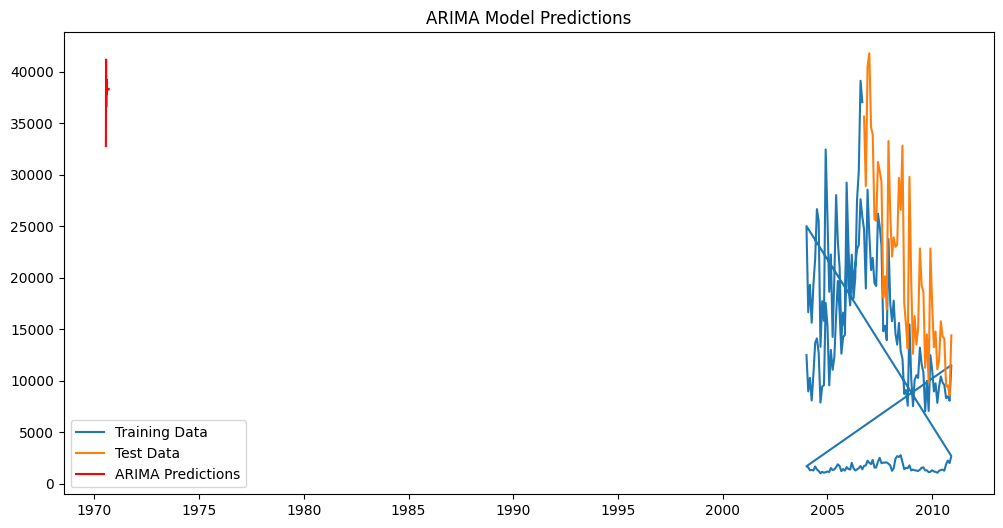

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['Baggage'], label='Training Data')
plt.plot(test['Baggage'], label='Test Data')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()


#Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['Baggage'], predictions)
mae = mean_absolute_error(test['Baggage'], predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 364914705.4211784
Mean Absolute Error (MAE): 17245.810685272463


#7. Compare the Actual Values With Forecasted Values Through Curve Fitting

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.arima.model import ARIMA



#Load Time Series Data

In [ ]:
# Assuming you have a time series dataset in a CSV file
data = pd.read_csv('baggagecomplaints.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


#Train ARIMA and make prediction

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

order = (p, d, q)  # Set appropriate values for p, d, q based on ACF and PACF analysis
model = ARIMA(train['Baggage'], order=order)
results = model.fit()

start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, typ='levels').rename("ARIMA Predictions")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

#Define a model function

In [ ]:
def linear_function(x, slope, intercept):
    return slope * x + intercept


#Fit the Model to Actual Data

In [ ]:
popt_actual, _ = curve_fit(linear_function, np.arange(len(train)), train['Baggage'])



#Generate Fitted Curve for Actual Data

In [ ]:
y_fit_actual = linear_function(np.arange(len(train)), *popt_actual)


#Fit the Model to Forecasted Data

In [ ]:
popt_forecast, _ = curve_fit(linear_function, np.arange(len(train), len(train) + len(test)), predictions)



#Generate Fitted Curve for Forecasted Data

In [ ]:
y_fit_forecast = linear_function(np.arange(len(train), len(train) + len(test)), *popt_forecast)


#Plot Results

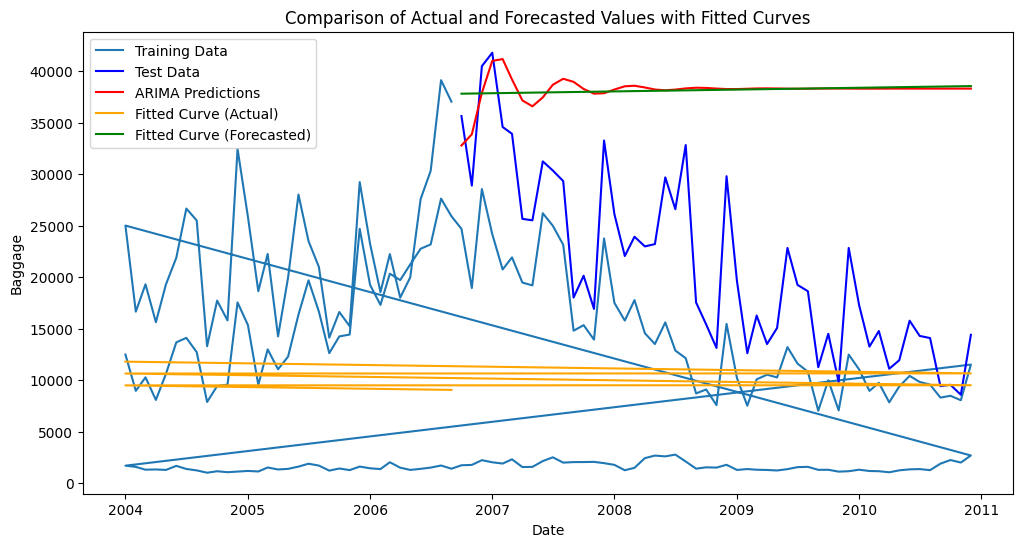

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Baggage'], label='Training Data')
plt.plot(test.index, test['Baggage'], label='Test Data', color='blue')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red')
plt.plot(train.index, y_fit_actual, label='Fitted Curve (Actual)', color='orange')
plt.plot(test.index, y_fit_forecast, label='Fitted Curve (Forecasted)', color='green')

plt.legend()
plt.title('Comparison of Actual and Forecasted Values with Fitted Curves')
plt.xlabel('Date')
plt.ylabel('Baggage')
plt.show()


#8. Perform Various Statistical analysis: AFER, RMSE, U-Statistic

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import mannwhitneyu


In [ ]:
# Assuming you have a time series dataset in a CSV file
data = pd.read_csv('baggagecomplaints.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

order = (p, d, q)  # Set appropriate values for p, d, q based on ACF and PACF analysis
model = ARIMA(train['Baggage'], order=order)
results = model.fit()

start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, type='levels').rename("ARIMA Predictions")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Convert predictions to a NumPy array
predictions_array = predictions.values

# Actual values from the test set
actual_values = test['Baggage'].values

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_values, predictions_array)
rmse = np.sqrt(mean_squared_error(actual_values, predictions_array))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 17245.810685272463
Root Mean Squared Error (RMSE): 19102.740782965633


In [ ]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(actual_values, predictions_array)
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Statistic: 108.0
P-value: 1.4907657773812137e-15


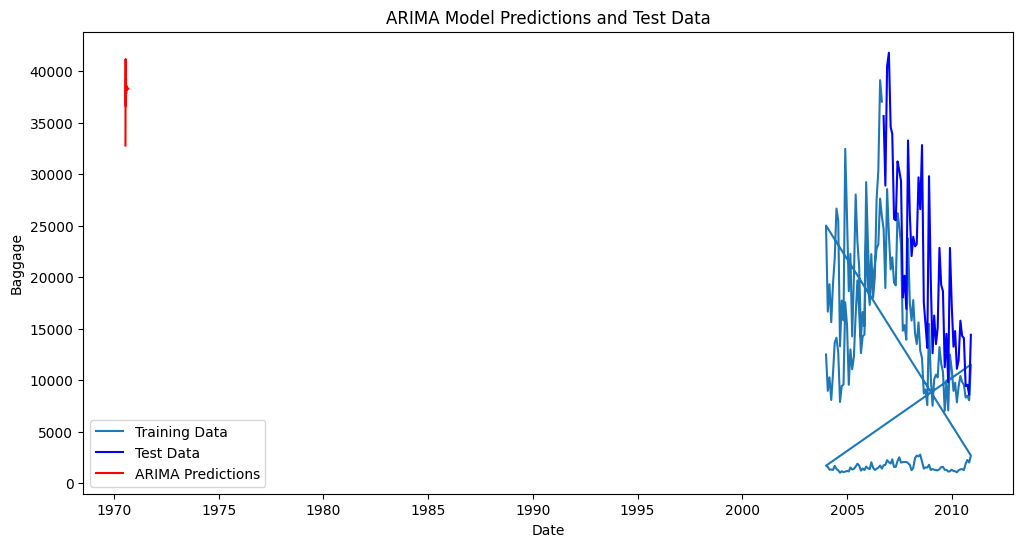

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['Baggage'], label='Training Data')
plt.plot(test['Baggage'], label='Test Data', color='blue')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions and Test Data')
plt.xlabel('Date')
plt.ylabel('Baggage')
plt.show()
